# Signal Representations

## Real Signals

### Real Lowpass Signal

**Definition: Bandwidth**  
For a *real* signal $x(t)$, the **bandwidth** is the smallest range of positive frequencies such that $X(f) = 0$ when $|f|$ lies outside this range.  
It follows that the bandwidth of a real signal is **half** of its total frequency support.

**Definition: Lowpass (or Baseband) Signal**  
A **lowpass** or **baseband** signal is one whose spectrum is concentrated around the **zero** frequency.  

For instance, speech, music, and video signals are examples of lowpass signals, even though they differ in spectral characteristics and bandwidths. Typically, lowpass signals are low-frequency signals, meaning they vary slowly over time and do not exhibit sudden jumps or rapid changes.  

The bandwidth of a **real lowpass signal** is the smallest positive value $W$ such that $X(f) = 0$ for all frequencies outside the range $[-W, +W]$.

### Additional Notes on Bandwidth and Complex Signals

- The spectrum of a real signal can be expressed as:  

  $$
  X(f) = X_+(f) + X_-(f)
  $$
  
  where:
  - $X_+(f) = X(f) \cdot u_{-1}(f)$ (the positive-frequency component)
  - $X_-(f) = X(f) \cdot u_{-1}(-f)$ (the negative-frequency component)

- For a **complex** signal $x(t)$, the spectrum $X(f)$ is **not symmetric**, meaning the signal **cannot be reconstructed using only positive-frequency information**.

**Definition: Bandwidth of Complex Signals**  
For a complex signal, the **bandwidth** is defined as **half** of the entire range of frequencies over which the spectrum is nonzero. This corresponds to half of the signal's **frequency support**.  

This definition ensures consistency with the bandwidth definition for real signals. Thus, for both real and complex signals, the bandwidth is defined as **half** of the frequency support.  



### Bandpass Signals

**Motivation for Using Bandpass Signals**  
- In practice, the **spectral characteristics** of the message signal and the communication channel often do not align.  
- To address this mismatch, the message signal is **modulated** to match its spectral characteristics to those of the channel.  

By modulating the lowpass message signal, its spectrum is shifted to **higher frequencies**, resulting in a **bandpass signal**.

### Definition and Characteristics

A **bandpass signal** is a real signal whose frequency content (spectrum) is concentrated around a frequency $ \pm f_0 $, which is far from zero.  

**Definition: Bandpass Signal**  
A **bandpass signal** is a real signal $ x(t) $ for which there exist positive $ f_0 $ and $ W $ such that the positive spectrum $ X_+(f) $ is nonzero only within the interval $[f_0 - W/2, f_0 + W/2]$, where $ W/2 < f_0 $ (in practice, $ W \ll f_0 $).

**Definition: Central Frequency**  
The frequency $ f_0 $ is referred to as the **central frequency** of the bandpass signal.

**Key Points**:  
- The **bandwidth** of $ x(t) $ is at most $ W $.  
- Bandpass signals are typically high-frequency signals characterized by **rapid variations** in the time domain.  

### Spectrum of a Bandpass Signal

**Figure: Spectrum of a Real-Valued Bandpass Signal**  
The spectrum of a real bandpass signal is shown below.  
- The **magnitude spectrum** (solid line) is **even**.  
- The **phase spectrum** (dashed line) is **odd**.  
- The **central frequency** $ f_0 $ is not necessarily the midband frequency of the bandpass signal.  


**Symmetry and Reconstruction**:  
- Since $ x(t) $ is a **real signal**, the spectrum $ X(f) $ exhibits symmetry.  
- The positive spectrum $ X_+(f) $ contains all the necessary information to reconstruct $ X(f) $:  

  $$
  X(f) = X_+(f) + X_-(f) = X_+(f) + X_+^*(-f)
  $$  

  This means that knowledge of $ X_+(f) $ is sufficient to fully determine $ X(f) $.  


#### Python Simulation

**Low-Pass Signal:**  
The low-pass signal is generated as:

  $$
  x_{\text{real,lp}}(t) = a \cdot \sin(\omega_0 \cdot t + \theta)
  $$

where:
  - $ \omega_0 = \frac{2\pi}{T} $ is the baseband angular frequency, corresponding to a frequency $ f_0 = \frac{1}{T} $ Hz.
  - In this example, $ T = 1 $, so $ f_0 = 1 $ Hz.

This means the low-pass signal has a sinusoidal frequency content at $ f_0 = 1 $ Hz, which is close to 0 Hz in the spectrum.

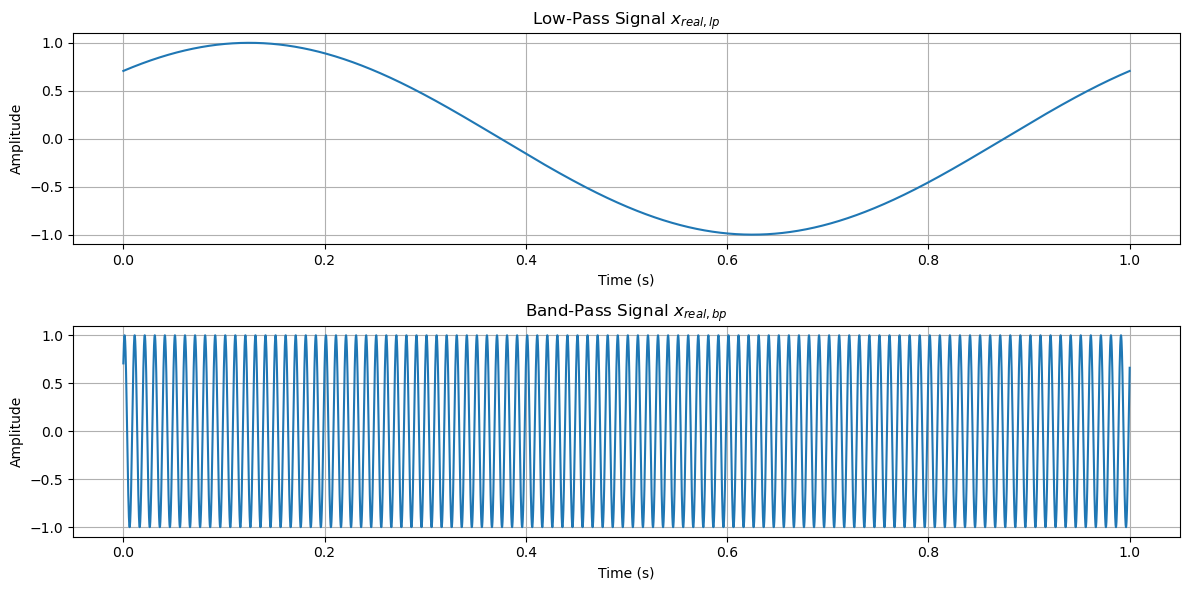

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
a = 1                   # Amplitude
T = 1                   # Signal period (seconds)
fs = 10000               # Sampling rate (samples per second)
omega_0 = 2 * np.pi / T # Baseband angular frequency (rad/s)
f_c = 100               # Carrier frequency (Hz)
theta = np.pi / 4       # Phase in radians

# Time vector: compute based on signal period and sampling rate
t = np.arange(0, T, 1/fs)  # Time vector from 0 to T seconds with 1/fs interval

# Generate the low-pass signal
x_real_lp = a * np.sin(omega_0 * t + theta)

# Generate the band-pass signal
omega_c = 2 * np.pi * f_c  # Convert carrier frequency to angular frequency
x_real_bp = a * np.sin(omega_c * t + theta)

# Plot the signals
plt.figure(figsize=(12, 6))

# Plot low-pass signal
plt.subplot(2, 1, 1)
plt.plot(t, x_real_lp)
plt.title('Low-Pass Signal $x_{real, lp}$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot band-pass signal
plt.subplot(2, 1, 2)
plt.plot(t, x_real_bp)
plt.title('Band-Pass Signal $x_{real, bp}$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


**Fourier Transform:**
   - The FT of a sinusoidal signal results in two impulses at the positive and negative frequency of the signal:
     - $ \pm f_0 = \pm 1 $ Hz.
   - Since this is a low-pass signal, the FT is concentrated near the center of the spectrum (0 Hz).

**Frequency Vector and FFT Output:**
   - The frequency vector `f` is centered at 0 (using `np.fft.fftshift`), so the FT of the low-pass signal will appear symmetrically around 0 Hz, with peaks at $ \pm 1 $ Hz.

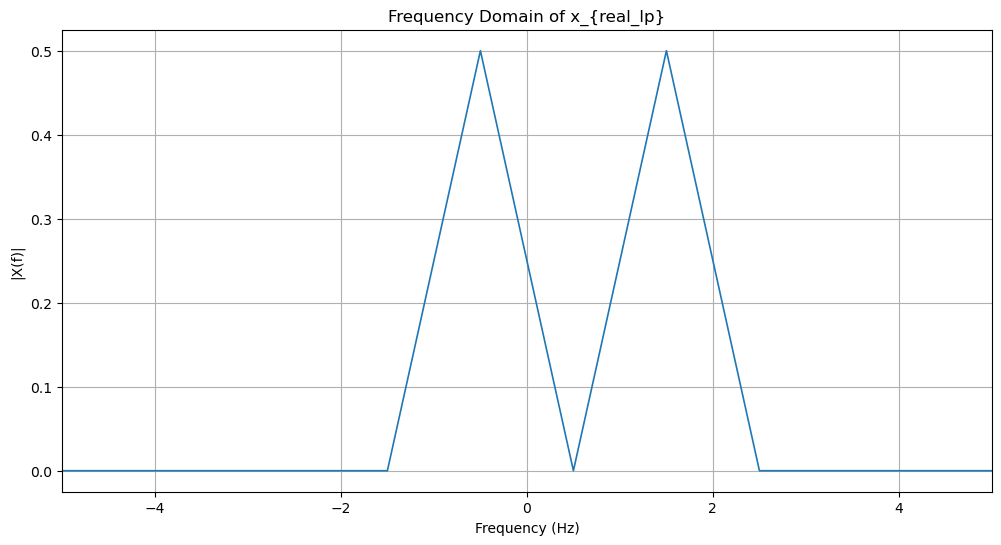

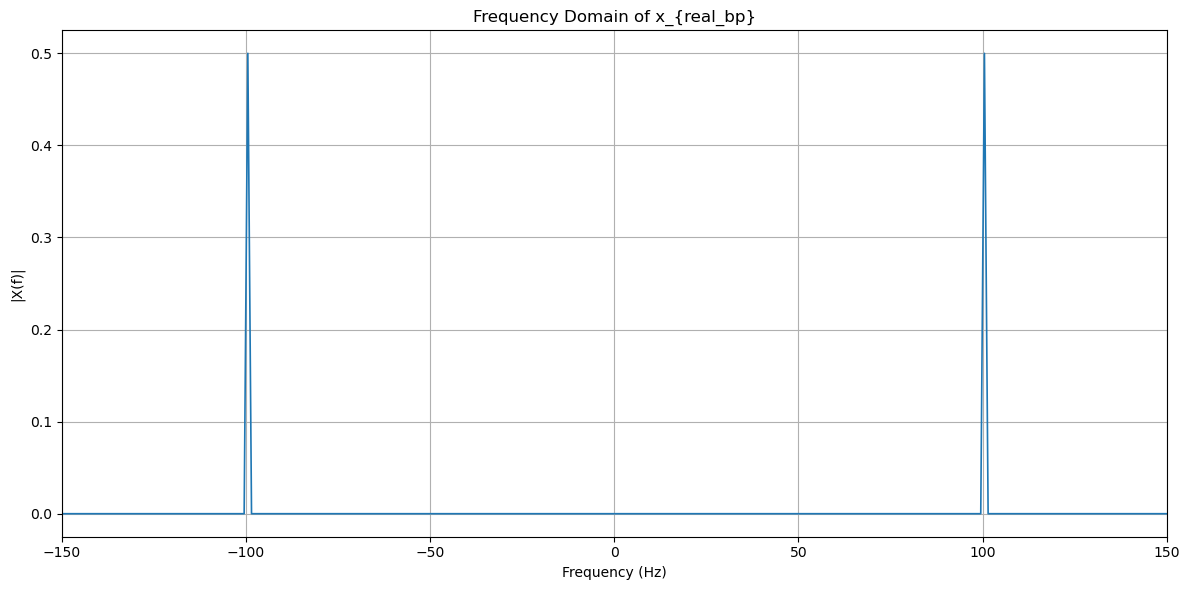

In [11]:
# Compute the FFT of the low-pass signal
X_real_lp_fft_shifted = np.fft.fftshift(np.fft.fft(x_real_lp))  # Compute and shift FFT
X_real_bp_fft_shifted = np.fft.fftshift(np.fft.fft(x_real_bp))  # Compute and shift FFT

# Frequency vector
N = len(t)                      # Total number of samples
f = np.linspace(-fs/2, fs/2, N) # Frequency vector in Hz, centered at 0
# Plot the signals


# Plot low-pass signal in the frequency domain
plt.figure(figsize=(12, 6))
plt.plot(f, np.abs(X_real_lp_fft_shifted)/N, linewidth=1.2)
plt.title('Frequency Domain of x_{real_lp}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|X(f)|')
plt.xlim([-5, 5]) # Limit frequency axis for low-pass signal
plt.grid(True)

# Plot band-pass signal in the frequency domain
plt.figure(figsize=(12, 6))
plt.plot(f, np.abs(X_real_bp_fft_shifted)/N, linewidth=1.2)
plt.title('Frequency Domain of x_{real_bp}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|X(f)|')
plt.xlim([-150, 150]) # Limit frequency axis for band-pass signal
plt.grid(True)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()



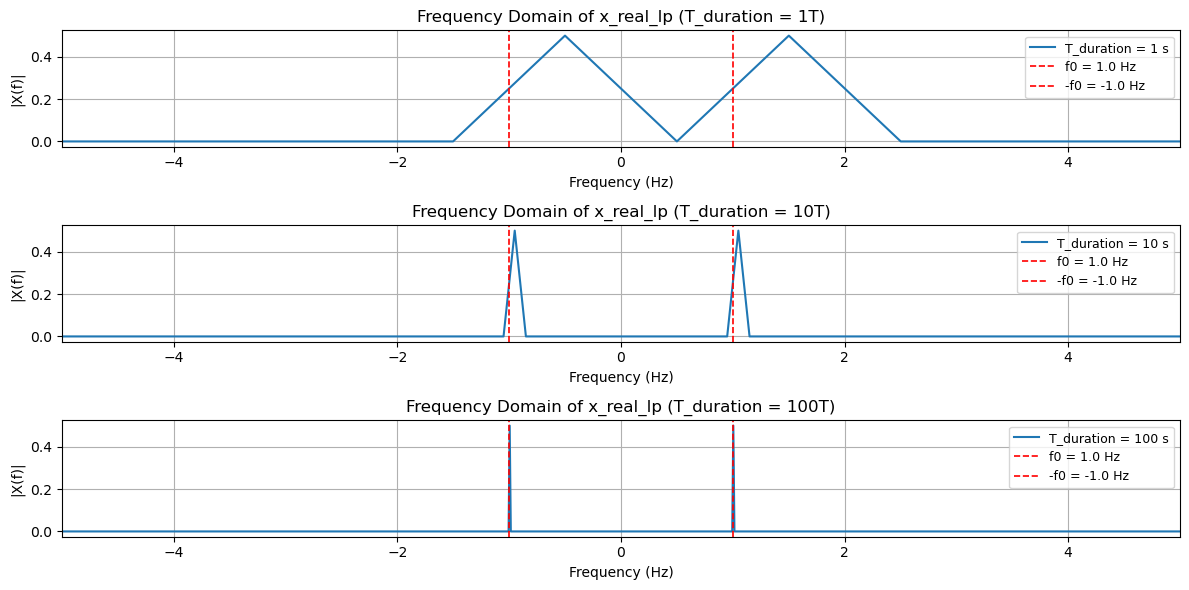

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
a = 1                   # Amplitude
T = 1                   # Signal period (seconds)
fs = 1000               # Sampling rate (samples per second)
omega_0 = 2 * np.pi / T # Baseband angular frequency (rad/s)
theta = np.pi / 4       # Phase in radians

# Different T_duration values
T_durations = [1 * T, 10 * T, 100 * T]

# Create a figure
plt.figure(figsize=(12, 6))

# Loop over different T_duration values
for i, T_duration in enumerate(T_durations):
    # Time vector and signal length
    t = np.arange(0, T_duration, 1/fs)
    N = len(t)  # Total number of samples

    # Regenerate the low-pass signal
    x_real_lp = a * np.sin(omega_0 * t + theta)

    # Compute the FFT and frequency vector
    X_real_lp_fft_shifted = np.fft.fftshift(np.fft.fft(x_real_lp))
    f = np.linspace(-fs/2, fs/2, N)

    # Plot the Fourier Transform
    plt.subplot(3, 1, i + 1)  # Create a subplot for each T_duration
    plt.plot(f, np.abs(X_real_lp_fft_shifted)/N, linewidth=1.5, label=f'T_duration = {T_duration} s')
    plt.axvline(x=1/T, color='red', linestyle='--', linewidth=1.2, label=f'f0 = {1/T} Hz')  # Positive f0
    plt.axvline(x=-1/T, color='red', linestyle='--', linewidth=1.2, label=f'-f0 = {-1/T} Hz')  # Negative f0
    plt.title(f'Frequency Domain of x_real_lp (T_duration = {T_duration:.0f}T)', fontsize=12)
    plt.xlabel('Frequency (Hz)', fontsize=10)
    plt.ylabel('|X(f)|', fontsize=10)
    plt.xlim([-5, 5])  # Limit frequency axis for better visualization
    plt.grid(True)
    plt.legend(fontsize=9)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


### Analytic Signal (Pre-envelope)

**Definition: Analytic Signal**  
The **analytic signal** (also called the **pre-envelope**) corresponding to a signal $x(t)$ is the complex signal $x_+(t)$ whose Fourier transform is $X_+(f)$. It is defined as:  

$$
x_+(t) = \mathcal{F}^{-1}[X_+(f)] = \frac{1}{2}x(t) + j\frac{1}{2}\hat{x}(t)
$$

Here, $\hat{x}(t)$ is the **Hilbert transform** of $x(t)$, given by: 
 
$$
\hat{x}(t) = \frac{1}{\pi t} * x(t)
$$

### Hilbert Transform

The **Hilbert transform** of $x(t)$:  
- Introduces a phase shift of $-\frac{\pi}{2}$ to the positive frequency components of $x(t)$.  
- Introduces a phase shift of $+\frac{\pi}{2}$ to the negative frequency components of $x(t)$.  

In the frequency domain, it is expressed as:  

$$
\mathcal{F}[\hat{x}(t)] = -j \, \text{sgn}(f) X(f)
$$

### Properties of the Analytic Signal

1. The analytic signal $x_+(t)$ contains only **positive frequency components**.  
2. Its spectrum $X_+(f)$ is **not Hermitian** (i.e., it is not symmetric about the origin).  
3. $x_+(t)$ is generally a **complex signal**, even if $x(t)$ is real.  


#### Matlab Example: Compute Envelope Spectrum

Compute the envelope of the filtered signal using `Hilbert` as the method

[Compute Envelope Spectrum of Vibration Signal
](https://www.mathworks.com/help/signal/ug/compute-envelope-spectrum.html)